# Adrian's workspace
### testing ect. is done here

First get familiar with the dataset

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as time

In [25]:
raw_bike_data = pd.read_csv("../chicago_2016.csv")
raw_bike_data.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,3/31/2016 23:53,4/1/2016 0:07,344,458,Ravenswood Ave & Lawrence Ave,Broadway & Thorndale Ave,155,Subscriber
1,3/31/2016 23:46,3/31/2016 23:57,128,213,Damen Ave & Chicago Ave,Leavitt St & North Ave,4831,Subscriber
2,3/31/2016 23:42,3/31/2016 23:46,350,210,Ashland Ave & Chicago Ave,Ashland Ave & Division St,4232,Subscriber
3,3/31/2016 23:37,3/31/2016 23:55,303,458,Broadway & Cornelia Ave,Broadway & Thorndale Ave,3464,Subscriber
4,3/31/2016 23:33,3/31/2016 23:37,334,329,Lake Shore Dr & Belmont Ave,Lake Shore Dr & Diversey Pkwy,1750,Subscriber


In [7]:
raw_bike_data.describe()

,start_station_id,end_station_id,bike_id
count,3.595383e+06,3.595383e+06,3.595383e+06
mean,1.780261e+02,1.784356e+02,2.968744e+03
std,1.271721e+02,1.272927e+02,1.675501e+03
min,2.000000e+00,2.000000e+00,1.000000e+00
25%,7.400000e+01,7.400000e+01,1.523000e+03
50%,1.570000e+02,1.570000e+02,3.032000e+03
75%,2.680000e+02,2.680000e+02,4.382000e+03
max,6.200000e+02,6.200000e+02,5.920000e+03


In [11]:
raw_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3595383 entries, 0 to 3595382
Data columns (total 8 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   start_time          object
 1   end_time            object
 2   start_station_id    int64 
 3   end_station_id      int64 
 4   start_station_name  object
 5   end_station_name    object
 6   bike_id             int64 
 7   user_type           object
dtypes: int64(3), object(5)
memory usage: 219.4+ MB


In [13]:
raw_bike_data.isnull().sum()

start_time            0
end_time              0
start_station_id      0
end_station_id        0
start_station_name    0
end_station_name      0
bike_id               0
user_type             0
dtype: int64

In [26]:
raw_bike_data["start_time"] = pd.to_datetime(raw_bike_data["start_time"])
raw_bike_data["end_time"] = pd.to_datetime(raw_bike_data["end_time"])
raw_bike_data["Month"] = raw_bike_data["start_time"].apply(lambda x:x.month)
may_bike_data = raw_bike_data[(raw_bike_data["Month"] == 5)]

In [104]:
#aggregate dataset
may_bike_data["duration"] = may_bike_data["end_time"] - may_bike_data["start_time"]
may_bike_data["day"] = may_bike_data["start_time"].apply(lambda x:x.day)
first_may_bike_data = may_bike_data[may_bike_data["day"] == 1]


<ipython-input-104-c2084dc337ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may_bike_data["duration"] = may_bike_data["end_time"] - may_bike_data["start_time"]
<ipython-input-104-c2084dc337ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may_bike_data["day"] = may_bike_data["start_time"].apply(lambda x:x.day)


In [105]:
first_may_bike_data["start_hour"] = first_may_bike_data["start_time"].apply(lambda x:x.hour)
first_may_bike_data["durationInSeconds"] = first_may_bike_data["duration"].apply(lambda x:x.total_seconds())

<ipython-input-105-ed13a4d518df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_may_bike_data["start_hour"] = first_may_bike_data["start_time"].apply(lambda x:x.hour)
<ipython-input-105-ed13a4d518df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_may_bike_data["durationInSeconds"] = first_may_bike_data["duration"].apply(lambda x:x.total_seconds())


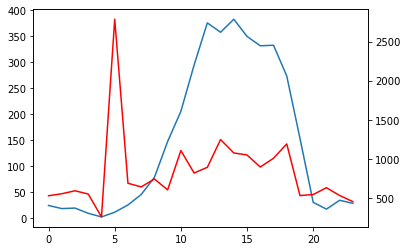

In [123]:
aggr = first_may_bike_data.groupby("start_hour")
"""
#ggr.head()
fig, ax = plt.subplots()
ax.plot(aggr.index,aggr["durationInSeconds"])
ax.set_title("Bike Usage on the first of May 2016")
ax.set_xlabel("Time")
ax.set_ylabel("Usage time in seconds")
"""
#for key, value in aggr.groups:
#    print(value.count())
sizes = aggr.size()
fig, ax = plt.subplots()
ax.plot(sizes.index,sizes)
ax2 = ax.twinx()

start_data = first_may_bike_data.set_index("start_time")
start_data = start_data.resample("H").mean()

ax2.plot(sizes.index,start_data["durationInSeconds"],color="red")
may_bike_data.to_csv("may_data.csv")